## Matrix Properties


In [174]:
# Frobenius Norm 
import numpy as np
x = np.array([[1,2],[3,4]])
x

array([[1, 2],
       [3, 4]])

In [175]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [176]:
np.linalg.norm(x) # same function as for vector L2 norm

5.477225575051661

In [177]:
import torch
x_pt = torch.tensor([[1,2], [3,4.]]) # torch.norm() support floats only
torch.norm(x_pt)

tensor(5.4772)

In [178]:
# Matrix Multiplication (with a Vector)
A = np.array([[3,4], [5,6], [7,8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [179]:
b = np.array([1,2])

In [180]:
np.dot(A,b) # even though technically dot products are between vectors only

array([11, 17, 23])

In [181]:
A_pt = torch.tensor([[3,4], [5,6], [7,8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [182]:
b_pt = torch.tensor([1,2])
b_pt


tensor([1, 2])

In [183]:
torch.matmul(A_pt, b_pt) # like np.dot(), automatically infers dims in 
# in order to perform dot product, matvec, or matrix multiplication

tensor([11, 17, 23])

In [184]:
# Matrix Multiplication (with Two Matrices)
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [185]:
B = np.array([[1,9], [2,0]])
B

array([[1, 9],
       [2, 0]])

In [186]:
np.dot(A,B)

array([[11, 27],
       [17, 45],
       [23, 63]])

In [187]:
# Matric multiplication is not "commutative", (i.e AB # BA)
# so uncommenting the following line will throw a size mismatch error
# np.dot(B, A)
B_pt = torch.from_numpy(B) # much cleaner than TF conversion
B_pt

tensor([[1, 9],
        [2, 0]])

In [188]:
# another neat way to create the same tensor with transposition:
B_pt = torch.tensor([[1,2], [9,0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [189]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike in TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [190]:
# Symmetric Matrices 
X_sym = np.array([[0,1,2], [1,7,8], [2,8,9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [191]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [192]:
# Identity Matrices
I = torch.tensor([[1,0,0], [0,1,0], [0,0,1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [193]:
x_pt= torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [194]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

In [195]:
# Answers to Matrix Multiplication Qs
M_q = torch.tensor([[0, 1, 2], [3,4,5], [6,7, 8]])
M_q

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [196]:
V_q = torch.tensor([[-1,1,-2], [0,1,2]]).T
V_q

tensor([[-1,  0],
        [ 1,  1],
        [-2,  2]])

In [197]:
torch.matmul(M_q, V_q)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

In [198]:
# Matrix Inversion
X = np.array([[4,2], [-5,-3]])
X

array([[ 4,  2],
       [-5, -3]])

In [199]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [200]:
# As a quick side, let's prove that X^-1 X = I_n as per the slides:
np.dot(Xinv,X)

array([[1., 0.],
       [0., 1.]])

In [201]:
# and now back to solving for the unknown in w:
y = np.array([4,-7])
y

array([ 4, -7])

In [202]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

In [203]:
# Show that y = Xw
np.dot(X,w)

array([ 4., -7.])

In [204]:
# Geometric Visualization 
# Recall 4b +2c = 4, -5b -3c = -7 , c1 = 2- 2b, c2 = (7-5b)/3
b = np.linspace(-10, 10, 1000) # start, finish, n points 

In [205]:
c1 = 2 - 2*b

In [206]:
c2 = (7-5*b)/3

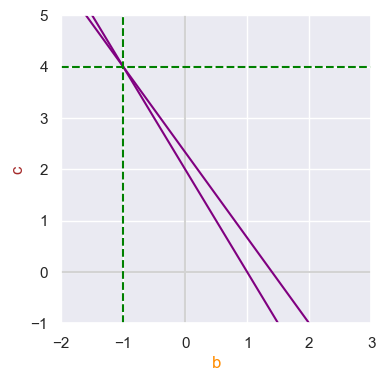

In [207]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.xlabel('b', c = 'darkorange')
plt.ylabel('c', c = 'brown')

plt.axvline(x=0, color= 'lightgray')
plt.axhline(y=0, color= 'lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='purple')
ax.plot(b, c2, c='purple')
ax.axvline(x=-1, color='green', linestyle='--')
ax.axhline(y=4, color='green', linestyle='--')

In [208]:
# In PyTorch
torch.inverse(torch.tensor([[4,2], [-5, -3.]])) # float type

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

Exercise:<br>
As done with Numpy above, uee PyTorh to calculate w from X and y.<br>
Subsequently, cofirm that y = Xw

In [210]:
# Matrix Inversion Where No Solution
X= np.array([[-4, 1], [-8, 2]]) 
X

array([[-4,  1],
       [-8,  2]])

In [175]:
# Xinv = np.linalg.inv(X) error
Xinv = np.linalg.inv(X)

LinAlgError: Singular matrix

In [211]:
# Orthogonal Matrices 
I = np.array([[1,0,0],[0,1,0],[0,0,1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [212]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [213]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [214]:
column_3 = I[:,2]
column_3


array([0, 0, 1])

In [215]:
np.dot(column_1, column_2)

0

In [216]:
np.dot(column_1, column_3)

0

In [217]:
np.dot(column_2, column_3)

0

In [218]:
# Use np.linalg.norm() to show I is a unit norm

np.linalg.norm(column_1)

1.0

In [219]:
np.linalg.norm(column_2)

1.0

In [220]:
np.linalg.norm(column_3)

1.0

In [221]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3,2/3,-2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [222]:
Kcol_1 = K[:, 0]
Kcol_1

tensor([ 0.6667, -0.6667,  0.3333])

In [223]:
Kcol_2 = K[:, 1]
Kcol_2

tensor([0.3333, 0.6667, 0.6667])

In [224]:
Kcol_3 = K[:,2]
Kcol_3 

tensor([ 0.6667,  0.3333, -0.6667])

In [225]:
torch.dot(Kcol_1, Kcol_2)

tensor(0.)

In [226]:
torch.dot(Kcol_2, Kcol_3)

tensor(0.)

In [227]:
torch.norm(Kcol_2)

tensor(1.)

In [228]:
torch.norm(Kcol_2)

tensor(1.)

In [229]:
torch.norm(Kcol_3)

tensor(1.)

In [230]:
#A^T A = I

torch.matmul(K.T, K)


tensor([[ 1.0000e+00, -3.3114e-09,  3.3114e-09],
        [-3.3114e-09,  1.0000e+00,  6.6227e-09],
        [ 3.3114e-09,  6.6227e-09,  1.0000e+00]])

## Eigendecomposition

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and egenvaluees. Before all, let's see what are eigenvectors and eigenvalues.

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [233]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

In [234]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

Let's plot v using plt_vector() function (which is based on Hadrien Jean's plotVectors() function from this notebook, MIT licence).

In [235]:
# Affine Transformation via Matrix Application 
# let's say we have a vector v:
v = np.array([3,1])
v

array([3, 1])

(-1.0, 4.0)

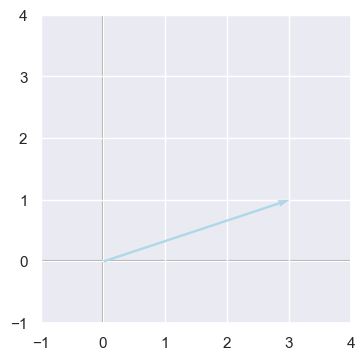

In [236]:
plotVectors([v.flatten()], cols = ['lightblue'])
plt.xlim(-1, 4)
plt.ylim(-1, 4)

Applying a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector. e.g, rotate if or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule:
Applying an identity matrix does not transform the vector.

In [237]:
import numpy as np
I = np.array([[1,0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [238]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [239]:
v == Iv

array([ True,  True])

(-1.0, 4.0)

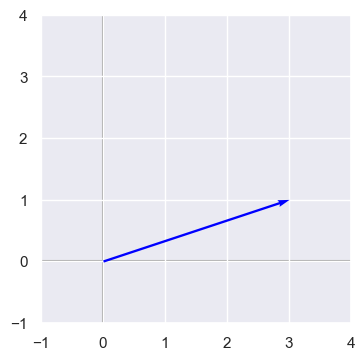

In [240]:
plotVectors([Iv], cols = ['blue'])
plt.xlim(-1,4)
plt.ylim(-1,4)

In contrast, consider this matrix(let's call it E) that flips vectors over the x-axis:

In [241]:
E = np.array([[1,0], [0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [242]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

(-1.0, 5.0)

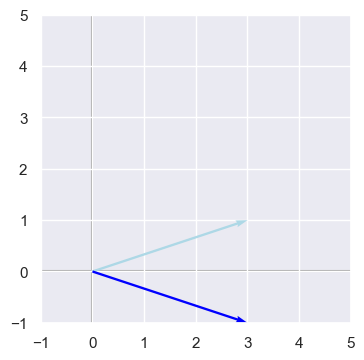

In [243]:
plotVectors([v,Ev], cols=['lightblue', 'blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)

Or, this matrix, F, which flips vectors over the y-axis

In [244]:
F = np.array([[-1,0], [0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [245]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

(-1.0, 5.0)

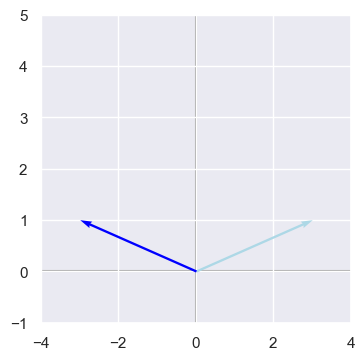

In [246]:
plotVectors([v,Fv], cols=['lightblue', 'blue'])
plt.xlim(-4, 4)
plt.ylim(-1,5)

Applying a flipping matrix is an example of an #affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them. 

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine tranformation include:
 - Scalling(changing the length of vectors)
 - Shearing(example of this on the Mona Lisa coming up shortly)
 -Rotation
 
 
 A single matrix can apply multiple affine tranforms simultaneously ( e.g., flip over an axis and rotae 45 degrees). As an example. let's see what happens when we apply this matrix A to vector v:

In [247]:
import numpy as np
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [248]:
Av = np.dot(A, v)
Av

array([1, 4])

(-1.0, 5.0)

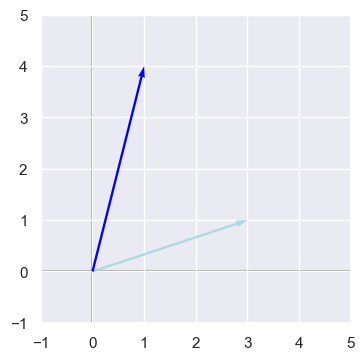

In [249]:
plotVectors([v, Av], cols = ['lightblue', 'blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)

(-1.0, 5.0)

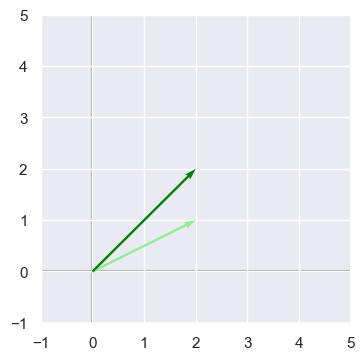

In [250]:
# Another example of applying A:
v2 = np.array([2,1])
plotVectors([v2, np.dot(A,v2)], cols = ['lightgreen', 'green'])
plt.xlim(-1, 5)
plt.ylim(-1,5)

We can concatenate several vectors together into a matrix (say,  𝑉 ), where each column is a separate vector. Then, whatever linear transformations we apply to  𝑉  will be independently applied to each column (vector):

In [251]:
v

array([3, 1])

In [252]:
# recall that we need to convert array to 2D to transpose into column, e.g., 
np.matrix(v).T

matrix([[3],
        [1]])

In [253]:
v3 = np.array([-3,-1]) # mirror image of v over both axes 
v4 = np.array([-1,1])

In [254]:
V = np.concatenate((np.matrix(v).T,
                   np.matrix(v2).T,
                   np.matrix(v3).T,
                   np.matrix(v4).T),
                  axis =1)

V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [255]:
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [256]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [257]:
# function to convert column of matrix to 1D vector:

def vectorfy(mtrx, clmn):
    return np.array(mtrx[:, clmn]).reshape(-1)

In [258]:
vectorfy(V, 0)

array([3, 1])

In [259]:
vectorfy(V,0) == v

array([ True,  True])

(-5.0, 5.0)

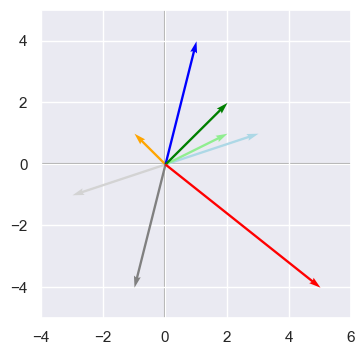

In [260]:
plotVectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            cols = ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4,6)
plt.ylim(-5,5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues...

# Eigenvectors and Eigenvalues

An eigenvector (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector  𝑣 
such that when it is transformed by some matrix (let's say  𝐴 ), the product  𝐴𝑣  has the exact same direction as  𝑣 .


An eigenvalue is a scalar (traditionally represented as  𝜆 ) that simply scales the eigenvector  𝑣  such that the following equation is satisfied:
𝐴𝑣=𝜆𝑣

# Easiest way to understand this is to work through an example:

A



Eigenvectors and eigenvalues can be derived algebraically (e.g., with the QR algorithm, which was independently developed in the 1950s by both Vera Kublanovskaya and John Francis), however this is outside scope of the ML Foundations series. We'll cheat with NumPy eig() method, which returns a tuple of:

a vector of eigenvalues
a matrix of eigenvectors



In [262]:
lambdas, V = np.linalg.eig(A)

In [263]:
# The matrix contains as many eigenvectors as there are colomn of A:
V # each colum is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [264]:
# With a corresponding eigenvalue for each eigenvector 
lambdas

array([ 1.37228132, -4.37228132])

In [265]:
# let's confirm that 𝐴𝑣=𝜆𝑣 for first eigenvector 
v = V[:, 0]
v

array([0.86011126, 0.51010647])

In [266]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python lambduh
lambduh 

1.3722813232690143

In [267]:
Av = np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [268]:
lambduh*v

array([1.18031462, 0.70000958])

(-1.0, 2.0)

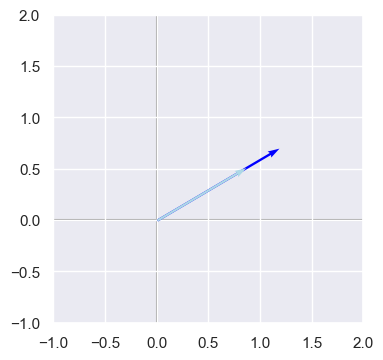

In [269]:
plotVectors([Av, v], cols= ['blue', 'lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [270]:
# And again for the second eigenvector of A:
v2 = V[:, 1]
v2

array([-0.76454754,  0.64456735])

In [271]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [272]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [273]:
lambda2*v2

array([ 3.34281692, -2.81822977])

(-3.0, 2.0)

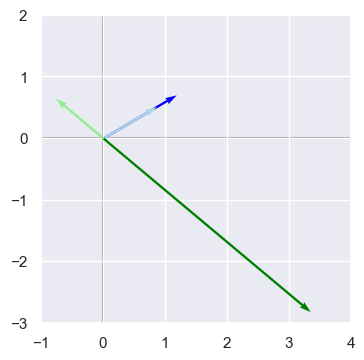

In [274]:
plotVectors([Av, v, Av2,v2], cols= ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,2)

In [275]:
# Using the PyTorch eig() method, we can do exactly the same:
A

array([[-1,  4],
       [ 2, -2]])

In [276]:
import torch
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [277]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [278]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact
       # real numbers 

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [279]:
V_p = V_cplx.float()
V_p

tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [280]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [281]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [282]:
lambdas_p = lambdas_cplx.float()
lambdas_p 

tensor([ 1.3723, -4.3723])

In [283]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [284]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors 
Av_p

tensor([1.1803, 0.7000])

In [285]:
lambda_p * v_p 

tensor([1.1803, 0.7000])

In [286]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [287]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [288]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av_p

tensor([1.1803, 0.7000])

In [289]:
lambda2_p.float()*v2_p.float()

tensor([ 3.3428, -2.8182])

(-3.0, 2.0)

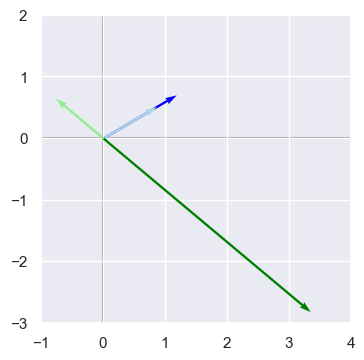

In [290]:
plotVectors([Av_p.numpy(),
             v_p.numpy(),
             Av2_p.numpy(),
             v2_p.numpy()],
             cols = ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,2)

# Eigenvectors in 2 Dimensions 

While plotting gets tricker in higer-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handle over three rows):


In [291]:
import numpy as np
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [292]:
lambdas_X, V_X = np.linalg.eig(X)

In [293]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [294]:
lambdas_X # a corresponding eigenvalue for each eigenvector 

array([29.67623202, 20.62117365, -0.29740567])

Confirm  𝑋𝑣=𝜆𝑣  for an example eigenvector:

In [295]:
v_X = V_X[:, 0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [296]:
lambda_X = lambdas_X[0]
lambda_X

29.676232023948916

In [297]:
np.dot(X, v_X) # matrix multiplication


array([-21.12227645, -19.77983919,  -6.5792208 ])

In [298]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [299]:
X = np.array([[4,2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [300]:
np.linalg.det(X)

-2.0000000000000004

In [301]:
N = np.array([[-4, 1], [-8, 2]])

N



array([[-4,  1],
       [-8,  2]])

In [302]:
np.linalg.det(N)

0.0

Uncommenting the following line results in a "singular matrix" error<br>
Ninv = np.linalg.inv(N)

In [304]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int 

In [305]:
torch.det(N)

tensor(0.)

In [306]:
# Generalizing Determinants 

X = np.array([[1,2,4], [2,-1, 3], [0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [307]:
np.linalg.det(X)

19.999999999999996

In [308]:
# Determinants & Eigenvalues 

lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [309]:
np.product(lambdas)

19.99999999999999

Here's |det(𝑋)| in NumPy:

In [310]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's use a matrix  𝐵 , which is composed of basis vectors, to explore the impact of applying matrices with varying  |det(𝑋)|  values:

In [311]:
B = np.array([[1,0], [0,1]])
B

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

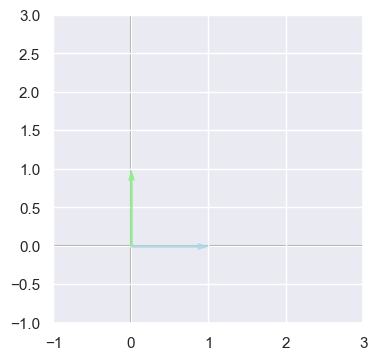

In [312]:
plotVectors([vectorfy(B,0), vectorfy(B,1)], cols = ['lightblue', 'lightgreen'])

plt.xlim(-1,3)
plt.ylim(-1,3)

Let's start by applying the matrix $N$ to B, recalling from earlier that N is singular: 


In [313]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [314]:
np.linalg.det(N)

0.0

In [315]:
NB = np.dot(N,B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

(-9.0, 3.0)

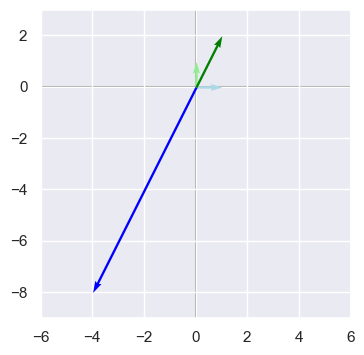

In [316]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            cols = ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
plt.ylim(-9, 3)

In [317]:
lambdas, V = np.linalg.eig(N)
lambdas 

array([-2.,  0.], dtype=float32)

If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero.


Now let's try applying  𝐼2  to  𝐵 :

In [318]:
I

array([[1, 0],
       [0, 1]])

In [319]:
np.linalg.det(I)

1.0

In [320]:
IB = np.dot(I,B)
IB

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

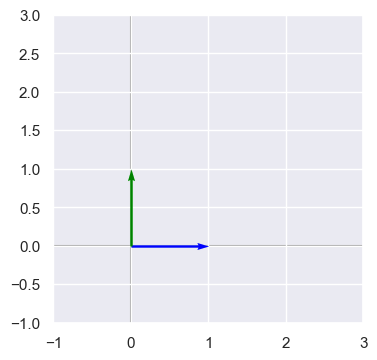

In [321]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
             cols = ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)

In [322]:
lambdas, V = np.linalg.eig(I)
lambdas 

array([1., 1.])

In [323]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [324]:
np.linalg.det(J)


-1.0

In [325]:
np.abs(np.linalg.det(J))

1.0

In [326]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

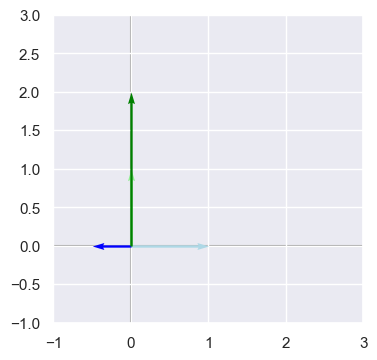

In [327]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)

In [328]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix  𝐷 , which scales vectors by doubling along both the  𝑥  and  𝑦  axes:

In [329]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [330]:
np.linalg.det(D)

4.0

In [331]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

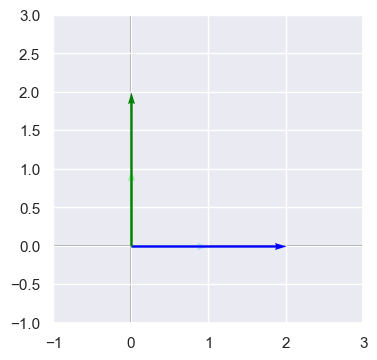

In [332]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)

In [333]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

# Eigendecomposition 

The eigendecomposition of some matrix 𝐴 is

𝐴=𝑉Λ𝑉−1

Where:

- As in examples above,  𝑉  is the concatenation of all the eigenvectors of  𝐴 
- Λ  (upper-case  𝜆 ) is the diagonal matrix diag( 𝜆 ). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix  𝐴 .


In [334]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]]) 
A 

array([[ 4,  2],
       [-5, -3]])

In [335]:
lambdas, V = np.linalg.eig(A)

In [336]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [337]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [338]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [339]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

  Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If 𝐴 is a real symmetric matrix then...

𝐴=𝑄Λ𝑄𝑇 

...where 𝑄 is analogous to  𝑉  from the previous equation except that it's special because it's an orthogonal matrix.

In [340]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [341]:
lambdas, Q = np.linalg.eig(A)
lambdas

array([3., 1.])

In [342]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [343]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [344]:
Q.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Let's confirm  𝐴=𝑄Λ𝑄𝑇 :

In [345]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that 𝑄 is an orthogonal matrix because  𝑄𝑇𝑄=𝑄𝑄𝑇=𝐼 .)

In [346]:
np.dot(Q.T, Q)

array([[1., 0.],
       [0., 1.]])

In [347]:
np.dot(Q, Q.T)

array([[1., 0.],
       [0., 1.]])